/tmp/ipykernel_1732002/1473002802.py:19: RuntimeWarning: invalid value encountered in log2
  df_ours["freq"] = df_ours.apply(lambda x: np.log2(x["co_freq"] / (x["root_freq"] * x["modifier_freq"]) if x["co_freq"] != 0.0 else gaussian_cdf_random(start, end)), axis=1)
/tmp/ipykernel_1732002/1473002802.py:20: RuntimeWarning: invalid value encountered in log2
  df_raw["freq"] = df_raw.apply(lambda x: np.log2(x["co_freq"] / (x["root_freq"] * x["modifier_freq"]) if x["co_freq"] != 0.0 else gaussian_cdf_random(start, end)), axis=1)


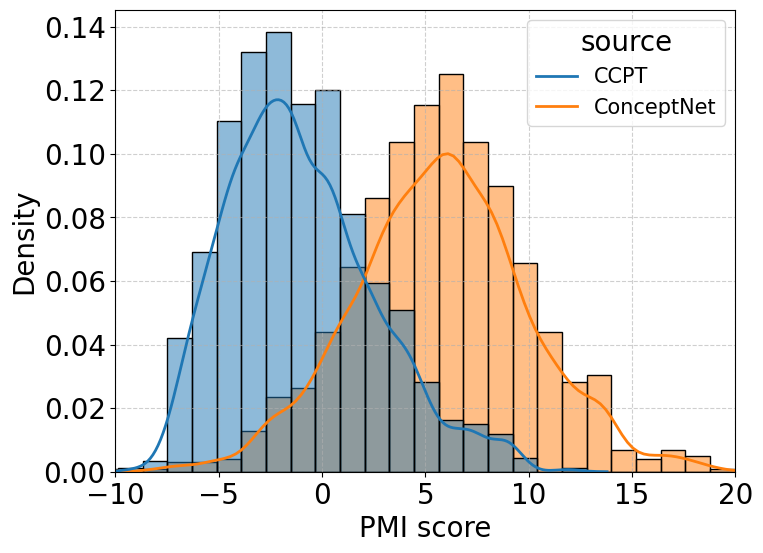

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 데이터 불러오기
df_ours = pd.read_csv("ccpt_bigram_googlengram.csv")
df_raw = pd.read_csv("conceptnet_bigram_googlengram.csv")

# 가우시안 CDF 기반 난수 생성 함수
def gaussian_cdf_random(start, end):
    gaussian_random_value = np.random.randn()
    cdf_value = norm.cdf(gaussian_random_value)
    return start + (end - start) * cdf_value

# PPMI Score 계산
start, end = -20, -10
df_ours["freq"] = df_ours.apply(lambda x: np.log2(x["co_freq"] / (x["root_freq"] * x["modifier_freq"]) if x["co_freq"] != 0.0 else gaussian_cdf_random(start, end)), axis=1)
df_raw["freq"] = df_raw.apply(lambda x: np.log2(x["co_freq"] / (x["root_freq"] * x["modifier_freq"]) if x["co_freq"] != 0.0 else gaussian_cdf_random(start, end)), axis=1)

# 데이터 라벨링
df_ours["source"] = "CCPT"
df_raw["source"] = "ConceptNet"

# 데이터 합치기
data = pd.concat([df_ours, df_raw])
data = data[['freq', 'source']].reset_index(drop=True)

# 그래프 스타일 설정
plt.figure(figsize=(8, 6))

sns.histplot(data=data, x="freq", hue="source", bins=40, stat="probability",
             common_norm=False, element="bars", edgecolor="black", alpha=0.5, multiple="layer")

# KDE (확률 밀도 곡선, 밴드폭 조정)
sns.kdeplot(data=data, x="freq", hue="source", common_norm=False, lw=2, bw_adjust=0.7)

# 범례 위치 조정
plt.xlabel("PMI score")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlim(-10, 20)

# Seaborn 범례 이동
sns.move_legend(hist, "upper right", title="Source")

# 그래프 저장 및 출력
output_file = "googlengram_freq_dist_fixed.pdf"
plt.savefig(output_file, dpi=300, bbox_inches="tight")
plt.show()

In [28]:
data[data['source'] == 'CCPT']['freq'].describe()

count    925.000000
mean      -1.030356
std        3.568100
min       -9.002610
25%       -3.686073
50%       -1.496290
75%        1.094475
max       11.879941
Name: freq, dtype: float64

In [29]:
data[data['source'] == 'ConceptNet']['freq'].describe()

count    1023.000000
mean        5.780488
std         4.410093
min       -11.066193
25%         3.008106
50%         5.806430
75%         8.398187
max        36.676574
Name: freq, dtype: float64